# 说明：

多个“大类”的输出：1. 颜色；2. 物品类型

In [2]:
import keras
from keras import layers
import numpy as np
import os
import glob

Using TensorFlow backend.


# 数据预处理：

### 先读入所有的图片，然后为每张图加上标签：

In [4]:
# 字符串前加r，防“转义”：
# 读入的东西，是每一张图片的“地址字符串”！
all_image_dir = glob.glob(r'E:\Python_code\keras_total\日月光华-keras课程资料\multi-output-classification\dataset\*\*')

In [5]:
len(all_image_dir)

2525

In [6]:
all_image_dir[:5]

['E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\black_jeans\\00000000.jpg',
 'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\black_jeans\\00000001.jpeg',
 'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\black_jeans\\00000002.jpeg',
 'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\black_jeans\\00000003.jpg',
 'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\black_jeans\\00000004.jpg']

### 把一起读入的图片，进行打乱：

In [7]:
import random

In [8]:
random.shuffle(all_image_dir)  # 直接对原对象乱序，无返回值

In [10]:
all_image_dir[:5], type(all_image_dir[0])

(['E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\black_shoes\\00000177.jpg',
  'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\black_jeans\\00000093.jpg',
  'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\blue_shirt\\00000100.png',
  'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\red_shirt\\00000077.jpg',
  'E:\\Python_code\\keras_total\\日月光华-keras课程资料\\multi-output-classification\\dataset\\blue_shirt\\00000229.jpg'],
 str)

### 提取每张图的标签：

In [15]:
# 根据读入每张图的“地址字符串”，发现第6个\\black_shoes\\双斜杠之间的字符是“标签”：
all_labels = [ p.split('\\')[6] for p in all_image_dir ]

In [16]:
all_labels[0:5]

['black_shoes', 'black_jeans', 'blue_shirt', 'red_shirt', 'blue_shirt']

In [19]:
# 再从all_labels中分别提取“颜色标签” + “物品类型标签”：根据下划线进行分割
color_labels = [ p.split('_')[0] for p in all_labels ]
item_labels = [ p.split('_')[1] for p in all_labels ] 

In [20]:
color_labels[0:5], item_labels[0:5]

(['black', 'black', 'blue', 'red', 'blue'],
 ['shoes', 'jeans', 'shirt', 'shirt', 'shirt'])

### 对“标签”进行数字编码：

In [21]:
# 先查看“颜色”与“物品类型”这两大标签，每个底下有多少类型：
# 用python内置的set数据类型（内部无重复）：
set( color_labels ), set( item_labels )

({'black', 'blue', 'red'}, {'dress', 'jeans', 'shirt', 'shoes'})

In [28]:
color_to_index = dict( (color, index) for index, color in enumerate(set(color_labels)) )
item_to_index = dict( (item, index) for index, item in enumerate(set(item_labels)) )

index_to_color = { index:color for color, index in color_to_index.items() }
index_to_item = { index:item for item, index in item_to_index.items() }

In [29]:
color_to_index, item_to_index, index_to_color, index_to_item

({'red': 0, 'blue': 1, 'black': 2},
 {'shirt': 0, 'jeans': 1, 'dress': 2, 'shoes': 3},
 {0: 'red', 1: 'blue', 2: 'black'},
 {0: 'shirt', 1: 'jeans', 2: 'dress', 3: 'shoes'})

In [30]:
# 对原来的标签进行数字编码：输入“键”，获取对应的“(数)值”
color_labels = [ color_to_index.get(c) for c in color_labels ]  
item_labels = [ item_to_index.get(i) for i in item_labels ]

In [31]:
color_labels[0:5], item_labels[0:5]

([2, 2, 1, 0, 1], [3, 1, 0, 0, 0])

### 对数据集划分：训练集、测试集 

In [32]:
split = int( len(all_image_dir)*0.8 )

In [33]:
train_dir = all_image_dir[:split]
test_dir = all_image_dir[split:]

In [35]:
# 转为array好用：
train_color_labels = np.array( color_labels[:split] )
test_color_labels = np.array( color_labels[split:] )

train_item_labels = np.array( item_labels[:split] )
test_item_labels = np.array( item_labels[split:] )

### 把图片加载进来：全部以“数组”形式加进来

说明：keras.preprocessing.image.里有很多好用的工具！但必须得先安装了“pillow”库 —— pip install pillow

下面定义“函数”来完成图片的加载：

In [36]:
def preprocess_image(path):
    image = keras.preprocessing.image.load_img( path, target_size = (224,224) )
    image_array = keras.preprocessing.image.img_to_array( image )  # 把图片转为对应的矩阵
    image_array = image_array / 127.5 - 1  # 这次是归一化到[-1,1]
    return image_array

In [37]:
# 一张一张加载“训练数据”：
train_image = [] 
for path in train_dir:
    train_image.append( preprocess_image(path) )
    
# 把列表中的每个元素，合并到一个高维数组当中 —— 元素的个数是“最高纬”
train_image_array = np.stack(train_image)

e:\pycharm\python374\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [38]:
train_image_array.shape  # 4纬数组，符合预期

(2020, 224, 224, 3)

In [39]:
# 一张一张加载“测试数据”：
test_image = [] 
for path in test_dir:
    test_image.append( preprocess_image(path) )
    
test_image_array = np.stack( test_image )

In [40]:
test_image_array.shape  # 4维数组，符合预期 

(505, 224, 224, 3)

# 网络搭建：函数式API

网络大体架构如图：
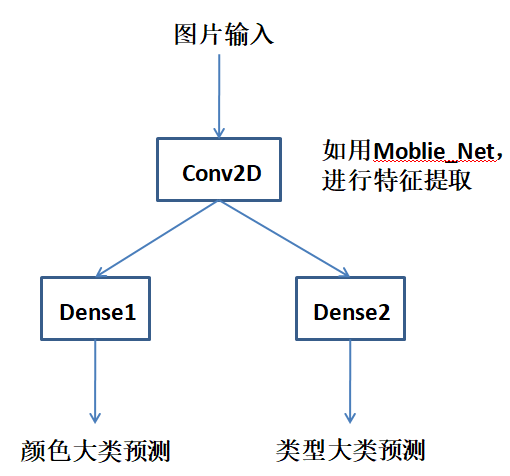

In [67]:
# 用它的权重和框架：
mobile_net = keras.applications.MobileNetV2( input_shape=(224,224,3), include_top = False, weights = 'imagenet' )  

In [68]:
inputs = keras.Input( shape = (224,224,3) )

In [69]:
x = mobile_net(inputs)  # 输出的还是一个4维的
x.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(1280)])

In [70]:
x = keras.layers.GlobalAveragePooling2D()(x)
x.shape

TensorShape([Dimension(None), Dimension(1280)])

In [71]:
# 颜色大类：
x1 = keras.layers.Dense( 1024, activation='relu' )(x)
out_color = keras.layers.Dense( 3, activation='softmax', name = 'out_color' )(x1)  # 分3类：加name，为了方便用不同的loss

In [72]:
# 类型大类：
x2 = keras.layers.Dense( 1024, activation='relu' )(x)
out_item = keras.layers.Dense( 4, activation='softmax', name = 'out_item' )(x2)   # 分4类

In [73]:
# 把函数式调用的网络，拼凑起来(初始化)：两个输出(列表)！
model = keras.Model( inputs = inputs, outputs = [out_color, out_item] )

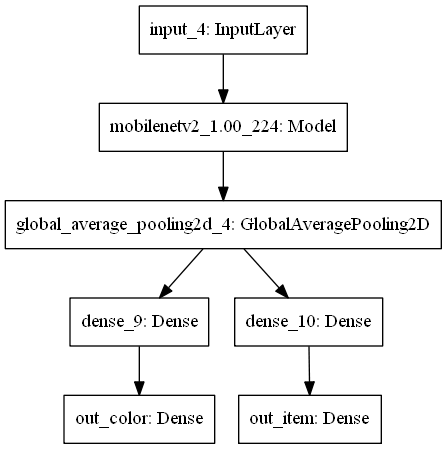

In [74]:
import os
os.environ['PATH'] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'  # 加r，防转义 
keras.utils.plot_model(model, to_file = '多输出模型.png')

# 模型训练与配置：

In [75]:
model.compile( optimizer = 'adam',
               loss = {'out_color':'sparse_categorical_crossentropy', 'out_item':'sparse_categorical_crossentropy'},
               #loss = 'sparse_categorical_crossentropy',   #  如果都用同一种loss，只写一个也可以 ；否则用上面的字典
               metrics = ['acc']
)

In [76]:
batch_size = 16  # 每次送入16张

在多输入模型训练时，需要有scipy库：不需要import，但必须要有！—— pip install scipy

In [78]:
# 有两个输出，所以输出部分用“列表”
model.fit( train_image_array,
           [train_color_labels, train_item_labels],  # 多输出
           epochs = 10,
           batch_size = batch_size,
           validation_data = (test_image_array, [test_color_labels, test_item_labels])  # 多输出
)


Train on 2020 samples, validate on 505 samples
Epoch 1/10
  32/2020 [..............................] - ETA: 24:35 - loss: 4.2258 - out_color_loss: 2.8743 - out_item_loss: 1.3515 - out_color_acc: 0.3438 - out_item_acc: 0.5625

KeyboardInterrupt: 

# 模型评价与预测：

“评价”与“预测”是不同的：
- 评价：是用“测试集”来评价最后模型的**正确率**；用的函数是model.evaluate()
- 预测：是用“单张、新的图片”放入模型，来看模型的**预测结果**；用的函数是model.predict()

In [ ]:
# 模型评价：
# verbose参数：设置为0，不显示它的评估过程，直接给最后的预测准确率
model.evaluate( test_image_array, [test_color_labels, test_item_labels], verbose = 0 )

In [79]:
# 模型预测：
# 给入一张经过同样操作“处理过的”图片 —— preprocess_image函数处理
path1 = r'E:\Python_code\keras_total\日月光华-keras课程资料\multi-output-classification\examples\black_dress.jpg'
my_image = preprocess_image(path1)  # 读入那张图，并做处理

# 因为model的输入数据要求是4维的(最高维是batch)，所以要把3维的my_image多加一维，即最高维batch = 1
my_image = np.expand_dims(my_image, 0)
my_image.shape

(1, 224, 224, 3)

In [ ]:
# 此时就可以放模型预测了：
model.predict(my_image) 
# 会给一个二维矩阵：
# [0.98, 0.01, 0.01] 这样的，我们需要把最大的那个取出来

In [ ]:
pre = model.predict(my_image)
# 把最大值的索引和对应的标签对应起来输出：
pre_color = index_to_color.get( np.argmax(pre[0][0]) )
pre_item = index_to_item.get( np.argmax(pre[1][0]) )

# 直接调用模型来预测：

In [ ]:
pre = model(my_image, training = False)  # 不用训练模型，就和上面直接预测没区别。